[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving baddata.txt to baddata.txt


In [2]:
!ls

datalab  fer2013.tar


In [3]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [5]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 64
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

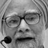

In [15]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))
'''
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
'''
#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())

'''
model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(Dense(7))
model.add(Activation('softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        153       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 48, 48, 64)        5760      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [30]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2,
    zoom_range=0.2)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=50,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
447/446 [==============================] - 59s 131ms/step - loss: 0.4846 - acc: 0.8248 - val_loss: 1.3189 - val_acc: 0.6254

Epoch 00001: val_acc did not improve from 0.65495
Epoch 2/50
214/446 [=============>................] - ETA: 29s - loss: 0.4844 - acc: 0.8243

447/446 [==============================] - 59s 131ms/step - loss: 0.4891 - acc: 0.8184 - val_loss: 1.2999 - val_acc: 0.6407

Epoch 00002: val_acc did not improve from 0.65495
Epoch 3/50
305/446 [===================>..........] - ETA: 17s - loss: 0.4690 - acc: 0.8299

447/446 [==============================] - 59s 131ms/step - loss: 0.4735 - acc: 0.8283 - val_loss: 1.3115 - val_acc: 0.6357

Epoch 00003: val_acc did not improve from 0.65495
Epoch 4/50
333/446 [=====================>........] - ETA: 14s - loss: 0.4677 - acc: 0.8294

447/446 [==============================] - 58s 131ms/step - loss: 0.4716 - acc: 0.8275 - val_loss: 1.2944 - val_acc: 0.6338

Epoch 00004: val_acc did not improve from 0.65495
Epoch 5/50
341/446 [=====================>........] - ETA: 13s - loss: 0.4774 - acc: 0.8262

447/446 [==============================] - 59s 131ms/step - loss: 0.4774 - acc: 0.8253 - val_loss: 1.2248 - val_acc: 0.6466

Epoch 00005: val_acc did not improve from 0.65495
Epoch 6/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4763 - acc: 0.8277

447/446 [==============================] - 58s 131ms/step - loss: 0.4786 - acc: 0.8259 - val_loss: 1.2341 - val_acc: 0.6385

Epoch 00006: val_acc did not improve from 0.65495
Epoch 7/50
344/446 [======================>.......] - ETA: 12s - loss: 0.4693 - acc: 0.8306

447/446 [==============================] - 58s 130ms/step - loss: 0.4782 - acc: 0.8282 - val_loss: 1.2770 - val_acc: 0.6371

Epoch 00007: val_acc did not improve from 0.65495
Epoch 8/50
344/446 [======================>.......] - ETA: 12s - loss: 0.4760 - acc: 0.8291

447/446 [==============================] - 58s 131ms/step - loss: 0.4796 - acc: 0.8267 - val_loss: 1.2626 - val_acc: 0.6499

Epoch 00008: val_acc did not improve from 0.65495
Epoch 9/50
344/446 [======================>.......] - ETA: 12s - loss: 0.4633 - acc: 0.8321

447/446 [==============================] - 58s 131ms/step - loss: 0.4634 - acc: 0.8314 - val_loss: 1.2743 - val_acc: 0.6460

Epoch 00009: val_acc did not improve from 0.65495
Epoch 10/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4576 - acc: 0.8335

447/446 [==============================] - 58s 131ms/step - loss: 0.4624 - acc: 0.8320 - val_loss: 1.3041 - val_acc: 0.6374

Epoch 00010: val_acc did not improve from 0.65495
Epoch 11/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4535 - acc: 0.8344

447/446 [==============================] - 58s 130ms/step - loss: 0.4570 - acc: 0.8329 - val_loss: 1.2532 - val_acc: 0.6483

Epoch 00011: val_acc did not improve from 0.65495
Epoch 12/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4527 - acc: 0.8338

447/446 [==============================] - 58s 131ms/step - loss: 0.4587 - acc: 0.8319 - val_loss: 1.2365 - val_acc: 0.6483

Epoch 00012: val_acc did not improve from 0.65495
Epoch 13/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4541 - acc: 0.8344

447/446 [==============================] - 59s 131ms/step - loss: 0.4565 - acc: 0.8336 - val_loss: 1.2697 - val_acc: 0.6430

Epoch 00013: val_acc did not improve from 0.65495
Epoch 14/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4569 - acc: 0.8335

447/446 [==============================] - 59s 131ms/step - loss: 0.4603 - acc: 0.8309 - val_loss: 1.2763 - val_acc: 0.6396

Epoch 00014: val_acc did not improve from 0.65495
Epoch 15/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4483 - acc: 0.8359

447/446 [==============================] - 58s 131ms/step - loss: 0.4489 - acc: 0.8363 - val_loss: 1.3051 - val_acc: 0.6335

Epoch 00015: val_acc did not improve from 0.65495
Epoch 16/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4542 - acc: 0.8353

447/446 [==============================] - 59s 131ms/step - loss: 0.4593 - acc: 0.8335 - val_loss: 1.3082 - val_acc: 0.6393

Epoch 00016: val_acc did not improve from 0.65495
Epoch 17/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4429 - acc: 0.8385

447/446 [==============================] - 58s 131ms/step - loss: 0.4503 - acc: 0.8360 - val_loss: 1.3121 - val_acc: 0.6371

Epoch 00017: val_acc did not improve from 0.65495
Epoch 18/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4411 - acc: 0.8404

447/446 [==============================] - 59s 131ms/step - loss: 0.4443 - acc: 0.8390 - val_loss: 1.3533 - val_acc: 0.6402

Epoch 00018: val_acc did not improve from 0.65495
Epoch 19/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4408 - acc: 0.8386

447/446 [==============================] - 58s 131ms/step - loss: 0.4460 - acc: 0.8358 - val_loss: 1.3410 - val_acc: 0.6318

Epoch 00019: val_acc did not improve from 0.65495
Epoch 20/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4337 - acc: 0.8421

447/446 [==============================] - 59s 131ms/step - loss: 0.4404 - acc: 0.8386 - val_loss: 1.3309 - val_acc: 0.6499

Epoch 00020: val_acc did not improve from 0.65495
Epoch 21/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4421 - acc: 0.8371

447/446 [==============================] - 58s 131ms/step - loss: 0.4414 - acc: 0.8375 - val_loss: 1.3835 - val_acc: 0.6315

Epoch 00021: val_acc did not improve from 0.65495
Epoch 22/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4440 - acc: 0.8380

447/446 [==============================] - 58s 131ms/step - loss: 0.4490 - acc: 0.8351 - val_loss: 1.3040 - val_acc: 0.6404

Epoch 00022: val_acc did not improve from 0.65495
Epoch 23/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4256 - acc: 0.8444

447/446 [==============================] - 59s 131ms/step - loss: 0.4306 - acc: 0.8419 - val_loss: 1.3044 - val_acc: 0.6494

Epoch 00023: val_acc did not improve from 0.65495
Epoch 24/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4260 - acc: 0.8458

447/446 [==============================] - 59s 131ms/step - loss: 0.4312 - acc: 0.8436 - val_loss: 1.3574 - val_acc: 0.6402

Epoch 00024: val_acc did not improve from 0.65495
Epoch 25/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4272 - acc: 0.8424

447/446 [==============================] - 58s 131ms/step - loss: 0.4314 - acc: 0.8417 - val_loss: 1.3438 - val_acc: 0.6438

Epoch 00025: val_acc did not improve from 0.65495
Epoch 26/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4303 - acc: 0.8438

447/446 [==============================] - 58s 131ms/step - loss: 0.4356 - acc: 0.8411 - val_loss: 1.2835 - val_acc: 0.6424

Epoch 00026: val_acc did not improve from 0.65495
Epoch 27/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4205 - acc: 0.8467

447/446 [==============================] - 59s 131ms/step - loss: 0.4286 - acc: 0.8437 - val_loss: 1.3434 - val_acc: 0.6396

Epoch 00027: val_acc did not improve from 0.65495
Epoch 28/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4285 - acc: 0.8442

447/446 [==============================] - 59s 131ms/step - loss: 0.4324 - acc: 0.8428 - val_loss: 1.3532 - val_acc: 0.6382

Epoch 00028: val_acc did not improve from 0.65495
Epoch 29/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4287 - acc: 0.8411

447/446 [==============================] - 58s 131ms/step - loss: 0.4276 - acc: 0.8423 - val_loss: 1.3061 - val_acc: 0.6410

Epoch 00029: val_acc did not improve from 0.65495
Epoch 30/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4195 - acc: 0.8479

447/446 [==============================] - 59s 131ms/step - loss: 0.4244 - acc: 0.8440 - val_loss: 1.3327 - val_acc: 0.6427

Epoch 00030: val_acc did not improve from 0.65495
Epoch 31/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4174 - acc: 0.8493

447/446 [==============================] - 58s 131ms/step - loss: 0.4253 - acc: 0.8459 - val_loss: 1.3659 - val_acc: 0.6377

Epoch 00031: val_acc did not improve from 0.65495
Epoch 32/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4117 - acc: 0.8512

447/446 [==============================] - 59s 131ms/step - loss: 0.4153 - acc: 0.8506 - val_loss: 1.3530 - val_acc: 0.6407

Epoch 00032: val_acc did not improve from 0.65495
Epoch 33/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4092 - acc: 0.8520

447/446 [==============================] - 58s 131ms/step - loss: 0.4145 - acc: 0.8492 - val_loss: 1.3644 - val_acc: 0.6497

Epoch 00033: val_acc did not improve from 0.65495
Epoch 34/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4146 - acc: 0.8473

447/446 [==============================] - 58s 130ms/step - loss: 0.4196 - acc: 0.8458 - val_loss: 1.3119 - val_acc: 0.6404

Epoch 00034: val_acc did not improve from 0.65495
Epoch 35/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4168 - acc: 0.8460

447/446 [==============================] - 58s 131ms/step - loss: 0.4203 - acc: 0.8459 - val_loss: 1.3655 - val_acc: 0.6485

Epoch 00035: val_acc did not improve from 0.65495
Epoch 36/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4107 - acc: 0.8502

447/446 [==============================] - 59s 131ms/step - loss: 0.4141 - acc: 0.8483 - val_loss: 1.3224 - val_acc: 0.6421

Epoch 00036: val_acc did not improve from 0.65495
Epoch 37/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4121 - acc: 0.8491

447/446 [==============================] - 59s 131ms/step - loss: 0.4144 - acc: 0.8487 - val_loss: 1.3447 - val_acc: 0.6488

Epoch 00037: val_acc did not improve from 0.65495
Epoch 38/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4019 - acc: 0.8540

447/446 [==============================] - 59s 131ms/step - loss: 0.4093 - acc: 0.8518 - val_loss: 1.3193 - val_acc: 0.6491

Epoch 00038: val_acc did not improve from 0.65495
Epoch 39/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4052 - acc: 0.8529

447/446 [==============================] - 59s 131ms/step - loss: 0.4078 - acc: 0.8510 - val_loss: 1.3698 - val_acc: 0.6410

Epoch 00039: val_acc did not improve from 0.65495
Epoch 40/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4029 - acc: 0.8530

447/446 [==============================] - 59s 131ms/step - loss: 0.4066 - acc: 0.8514 - val_loss: 1.3503 - val_acc: 0.6424

Epoch 00040: val_acc did not improve from 0.65495
Epoch 41/50
343/446 [======================>.......] - ETA: 13s - loss: 0.4054 - acc: 0.8536

447/446 [==============================] - 59s 131ms/step - loss: 0.4087 - acc: 0.8524 - val_loss: 1.3521 - val_acc: 0.6519

Epoch 00041: val_acc did not improve from 0.65495
Epoch 42/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3965 - acc: 0.8551

447/446 [==============================] - 58s 131ms/step - loss: 0.4033 - acc: 0.8528 - val_loss: 1.3606 - val_acc: 0.6340

Epoch 00042: val_acc did not improve from 0.65495
Epoch 43/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3967 - acc: 0.8550

447/446 [==============================] - 59s 131ms/step - loss: 0.3979 - acc: 0.8548 - val_loss: 1.3885 - val_acc: 0.6399

Epoch 00043: val_acc did not improve from 0.65495
Epoch 44/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3868 - acc: 0.8628

447/446 [==============================] - 59s 131ms/step - loss: 0.3923 - acc: 0.8610 - val_loss: 1.3939 - val_acc: 0.6505

Epoch 00044: val_acc did not improve from 0.65495
Epoch 45/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3964 - acc: 0.8560

447/446 [==============================] - 59s 131ms/step - loss: 0.4043 - acc: 0.8526 - val_loss: 1.3869 - val_acc: 0.6491

Epoch 00045: val_acc did not improve from 0.65495
Epoch 46/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3919 - acc: 0.8578

447/446 [==============================] - 59s 131ms/step - loss: 0.3940 - acc: 0.8567 - val_loss: 1.4165 - val_acc: 0.6388

Epoch 00046: val_acc did not improve from 0.65495
Epoch 47/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3956 - acc: 0.8570

447/446 [==============================] - 58s 131ms/step - loss: 0.4002 - acc: 0.8554 - val_loss: 1.3328 - val_acc: 0.6485

Epoch 00047: val_acc did not improve from 0.65495
Epoch 48/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3958 - acc: 0.8566

447/446 [==============================] - 59s 131ms/step - loss: 0.3993 - acc: 0.8550 - val_loss: 1.4307 - val_acc: 0.6298

Epoch 00048: val_acc did not improve from 0.65495
Epoch 49/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3863 - acc: 0.8577

447/446 [==============================] - 59s 131ms/step - loss: 0.3930 - acc: 0.8559 - val_loss: 1.4264 - val_acc: 0.6519

Epoch 00049: val_acc did not improve from 0.65495
Epoch 50/50
343/446 [======================>.......] - ETA: 13s - loss: 0.3832 - acc: 0.8603

447/446 [==============================] - 59s 132ms/step - loss: 0.3893 - acc: 0.8575 - val_loss: 1.3739 - val_acc: 0.6416

Epoch 00050: val_acc did not improve from 0.65495
--- 2925.677119731903 seconds ---


In [30]:

import time
start_time  = time.time()
model.fit(train_x, train_y, epochs=150, batch_size=batch_size, validation_data=(val_x, val_y),
             callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 28596 samples, validate on 3585 samples
Epoch 1/150
28596/28596 [==============================] - 54s 2ms/step - loss: 0.4168 - acc: 0.8481 - val_loss: 1.0697 - val_acc: 0.6728

Epoch 00001: val_acc improved from 0.66639 to 0.67280, saving model to Model.best.hdf5
Epoch 2/150
23168/28596 [=======================>......] - ETA: 9s - loss: 0.2719 - acc: 0.9060

28596/28596 [==============================] - 53s 2ms/step - loss: 0.2782 - acc: 0.9025 - val_loss: 1.1955 - val_acc: 0.6731

Epoch 00002: val_acc improved from 0.67280 to 0.67308, saving model to Model.best.hdf5
Epoch 3/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.1861 - acc: 0.9368 - val_loss: 1.4794 - val_acc: 0.6628

Epoch 00003: val_acc did not improve from 0.67308
Epoch 4/150
 6656/28596 [=====>........................] - ETA: 39s - loss: 0.1150 - acc: 0.9668

28596/28596 [==============================] - 53s 2ms/step - loss: 0.1372 - acc: 0.9564 - val_loss: 1.5617 - val_acc: 0.6711

Epoch 00004: val_acc did not improve from 0.67308
Epoch 5/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.1132 - acc: 0.9656 - val_loss: 1.6999 - val_acc: 0.6678

Epoch 00005: val_acc did not improve from 0.67308
Epoch 6/150
 6528/28596 [=====>........................] - ETA: 39s - loss: 0.0761 - acc: 0.9779

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0903 - acc: 0.9738 - val_loss: 1.8264 - val_acc: 0.6563

Epoch 00006: val_acc did not improve from 0.67308
Epoch 7/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0854 - acc: 0.9750 - val_loss: 2.0439 - val_acc: 0.6474

Epoch 00007: val_acc did not improve from 0.67308
Epoch 8/150
 6528/28596 [=====>........................] - ETA: 39s - loss: 0.0705 - acc: 0.9775

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0759 - acc: 0.9787 - val_loss: 1.9572 - val_acc: 0.6577

Epoch 00008: val_acc did not improve from 0.67308
Epoch 9/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0702 - acc: 0.9798 - val_loss: 2.0472 - val_acc: 0.6474

Epoch 00009: val_acc did not improve from 0.67308
Epoch 10/150
 6528/28596 [=====>........................] - ETA: 39s - loss: 0.0474 - acc: 0.9884

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0587 - acc: 0.9835 - val_loss: 2.0232 - val_acc: 0.6611

Epoch 00010: val_acc did not improve from 0.67308
Epoch 11/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0614 - acc: 0.9825 - val_loss: 2.0499 - val_acc: 0.6608

Epoch 00011: val_acc did not improve from 0.67308
Epoch 12/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0516 - acc: 0.9858

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0636 - acc: 0.9821 - val_loss: 2.0345 - val_acc: 0.6616

Epoch 00012: val_acc did not improve from 0.67308
Epoch 13/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0634 - acc: 0.9815 - val_loss: 2.1152 - val_acc: 0.6633

Epoch 00013: val_acc did not improve from 0.67308
Epoch 14/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0570 - acc: 0.9853

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0608 - acc: 0.9837 - val_loss: 2.0495 - val_acc: 0.6577

Epoch 00014: val_acc did not improve from 0.67308
Epoch 15/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0617 - acc: 0.9820 - val_loss: 2.1966 - val_acc: 0.6483

Epoch 00015: val_acc did not improve from 0.67308
Epoch 16/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0469 - acc: 0.9873

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0556 - acc: 0.9843 - val_loss: 2.1425 - val_acc: 0.6516

Epoch 00016: val_acc did not improve from 0.67308
Epoch 17/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0570 - acc: 0.9842 - val_loss: 2.1138 - val_acc: 0.6577

Epoch 00017: val_acc did not improve from 0.67308
Epoch 18/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0504 - acc: 0.9877

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0498 - acc: 0.9869 - val_loss: 2.1538 - val_acc: 0.6650

Epoch 00018: val_acc did not improve from 0.67308
Epoch 19/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0425 - acc: 0.9891 - val_loss: 2.2359 - val_acc: 0.6497

Epoch 00019: val_acc did not improve from 0.67308
Epoch 20/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0464 - acc: 0.9886

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0461 - acc: 0.9874 - val_loss: 2.2100 - val_acc: 0.6642

Epoch 00020: val_acc did not improve from 0.67308
Epoch 21/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0518 - acc: 0.9860 - val_loss: 2.2088 - val_acc: 0.6555

Epoch 00021: val_acc did not improve from 0.67308
Epoch 22/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0407 - acc: 0.9894

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0468 - acc: 0.9870 - val_loss: 2.1485 - val_acc: 0.6656

Epoch 00022: val_acc did not improve from 0.67308
Epoch 23/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0450 - acc: 0.9867 - val_loss: 2.3231 - val_acc: 0.6594

Epoch 00023: val_acc did not improve from 0.67308
Epoch 24/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0390 - acc: 0.9898

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0452 - acc: 0.9875 - val_loss: 2.2566 - val_acc: 0.6622

Epoch 00024: val_acc did not improve from 0.67308
Epoch 25/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0509 - acc: 0.9854 - val_loss: 2.2745 - val_acc: 0.6597

Epoch 00025: val_acc did not improve from 0.67308
Epoch 26/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0499 - acc: 0.9855

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0591 - acc: 0.9834 - val_loss: 2.2358 - val_acc: 0.6497

Epoch 00026: val_acc did not improve from 0.67308
Epoch 27/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0492 - acc: 0.9846 - val_loss: 2.2307 - val_acc: 0.6589

Epoch 00027: val_acc did not improve from 0.67308
Epoch 28/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0311 - acc: 0.9917

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0439 - acc: 0.9877 - val_loss: 2.2365 - val_acc: 0.6552

Epoch 00028: val_acc did not improve from 0.67308
Epoch 29/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0338 - acc: 0.9905 - val_loss: 2.3622 - val_acc: 0.6563

Epoch 00029: val_acc did not improve from 0.67308
Epoch 30/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0304 - acc: 0.9911

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0373 - acc: 0.9902 - val_loss: 2.2663 - val_acc: 0.6469

Epoch 00030: val_acc did not improve from 0.67308
Epoch 31/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0398 - acc: 0.9891 - val_loss: 2.3745 - val_acc: 0.6552

Epoch 00031: val_acc did not improve from 0.67308
Epoch 32/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0373 - acc: 0.9884

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0433 - acc: 0.9878 - val_loss: 2.2397 - val_acc: 0.6418

Epoch 00032: val_acc did not improve from 0.67308
Epoch 33/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0389 - acc: 0.9884 - val_loss: 2.2562 - val_acc: 0.6572

Epoch 00033: val_acc did not improve from 0.67308
Epoch 34/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0345 - acc: 0.9908

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0388 - acc: 0.9898 - val_loss: 2.3161 - val_acc: 0.6575

Epoch 00034: val_acc did not improve from 0.67308
Epoch 35/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0429 - acc: 0.9881 - val_loss: 2.3346 - val_acc: 0.6513

Epoch 00035: val_acc did not improve from 0.67308
Epoch 36/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0351 - acc: 0.9906

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0399 - acc: 0.9887 - val_loss: 2.3780 - val_acc: 0.6538

Epoch 00036: val_acc did not improve from 0.67308
Epoch 37/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0353 - acc: 0.9902 - val_loss: 2.3294 - val_acc: 0.6516

Epoch 00037: val_acc did not improve from 0.67308
Epoch 38/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0362 - acc: 0.9909

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0366 - acc: 0.9901 - val_loss: 2.4727 - val_acc: 0.6466

Epoch 00038: val_acc did not improve from 0.67308
Epoch 39/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0371 - acc: 0.9887 - val_loss: 2.4055 - val_acc: 0.6494

Epoch 00039: val_acc did not improve from 0.67308
Epoch 40/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0340 - acc: 0.9919

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0386 - acc: 0.9894 - val_loss: 2.3262 - val_acc: 0.6527

Epoch 00040: val_acc did not improve from 0.67308
Epoch 41/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0373 - acc: 0.9896 - val_loss: 2.3591 - val_acc: 0.6413

Epoch 00041: val_acc did not improve from 0.67308
Epoch 42/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0330 - acc: 0.9912

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0361 - acc: 0.9899 - val_loss: 2.3904 - val_acc: 0.6455

Epoch 00042: val_acc did not improve from 0.67308
Epoch 43/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0415 - acc: 0.9890 - val_loss: 2.3944 - val_acc: 0.6502

Epoch 00043: val_acc did not improve from 0.67308
Epoch 44/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0315 - acc: 0.9905

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0352 - acc: 0.9898 - val_loss: 2.3387 - val_acc: 0.6586

Epoch 00044: val_acc did not improve from 0.67308
Epoch 45/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0302 - acc: 0.9920 - val_loss: 2.3593 - val_acc: 0.6477

Epoch 00045: val_acc did not improve from 0.67308
Epoch 46/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0242 - acc: 0.9948

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0289 - acc: 0.9931 - val_loss: 2.3881 - val_acc: 0.6572

Epoch 00046: val_acc did not improve from 0.67308
Epoch 47/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0271 - acc: 0.9932 - val_loss: 2.3377 - val_acc: 0.6541

Epoch 00047: val_acc did not improve from 0.67308
Epoch 48/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0220 - acc: 0.9942

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0290 - acc: 0.9923 - val_loss: 2.4017 - val_acc: 0.6524

Epoch 00048: val_acc did not improve from 0.67308
Epoch 49/150
28596/28596 [==============================] - 53s 2ms/step - loss: 0.0318 - acc: 0.9916 - val_loss: 2.4893 - val_acc: 0.6446

Epoch 00049: val_acc did not improve from 0.67308
Epoch 50/150
 6400/28596 [=====>........................] - ETA: 39s - loss: 0.0294 - acc: 0.9923

28596/28596 [==============================] - 53s 2ms/step - loss: 0.0317 - acc: 0.9912 - val_loss: 2.4533 - val_acc: 0.6335

Epoch 00050: val_acc did not improve from 0.67308
Epoch 51/150
 3072/28596 [==>...........................] - ETA: 45s - loss: 0.0339 - acc: 0.9906

KeyboardInterrupt: ignored

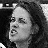

In [0]:
def predict_emotion(model, pic):
  pic = pic.convert('L')
  pic = pic.resize((48,48))
  
  from IPython.display import display
  display(pic)
  pic_np=np.asarray(pic)#.getdata()).reshape(48, 48, 1)
  pic_np = pic_np.reshape(1, 48, 48, 1)
  print(pic_np.shape)
  pic_np = pic_np / 255.0
  pic_np = pic_np - 0.5
  pic_np = pic_np * 2
  
  print(pic_np.shape)
  y = model.predict(pic_np)
  print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
  print(y)

In [0]:
from google.colab import files
uploaded = files.upload()

(48, 48, 1)


In [0]:
celebanger = Image.open("celeb_fer1.jpg")
predict_emotion(model, celebanger)

(48, 48, 1)


ValueError: ignored